In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import matplotlib.font_manager as fm
from matplotlib.ticker import MultipleLocator, IndexLocator, FuncFormatter
from matplotlib.dates import MonthLocator, DateFormatter

from matplotlib import font_manager, rcParams
!apt-get install fonts-nanum*
rcParams['font.family'] = 'NanumGothicCoding'
rcParams['axes.unicode_minus'] = False
font_manager._rebuild()

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from datetime import datetime
import datetime

In [ ]:
import folium
import json
geojson = json.load( open('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/seoulsigungu.geojson') )

In [ ]:
mpl.rc('font', family='NanumGothicCoding')

## 서울시 주택가격상승과 개인소득 변화

In [ ]:
house_avg_price_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균매매가격_연립다세대.xlsx', index_col=0)
house_avg_price_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균전세가격_연립다세대.xlsx', index_col=0)
house_avg_price_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/평균매매가격/12.01~21.11 평균월세가격_연립다세대.xlsx', index_col=0)

apt_avg_price_deal = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균매매가격_아파트.xlsx',index_col=0)
apt_avg_price_charter = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균전세가격_아파트.xlsx',index_col=0)
apt_avg_price_rent = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/전처리 데이터/apt/12.01~21.11 평균월세가격_아파트.xlsx',index_col=0)

In [ ]:
df_house = house_avg_price_deal['2012-01'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_house['구분'] = '연립다세대 매매가격'

df_house2 = house_avg_price_charter['2012-01'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_house2['구분'] = '연립다세대 전세가격'

df_apt = apt_avg_price_deal['2012-01'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_apt['구분'] = '아파트 매매가격'

df_apt2 = apt_avg_price_charter['2012-01'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_apt2['구분'] = '아파트 전세가격'

df_price_2006 = df_house.append(df_apt)
df_price_2006 = df_price_2006.append(df_house2)
df_price_2006 = df_price_2006.append(df_apt2)
df_price_2006 = df_price_2006.set_index(keys='구분',drop=True)
df_price_2006


,서울특별시,도심권,서남권,서북권,동북권,동남권
구분,,,,,,
연립다세대 매매가격,234325,292846,221882,200165,206578,303009
아파트 매매가격,540954,706316,452515,428866,362309,850021
연립다세대 전세가격,123471,111593,120328,106728,115456,158692
아파트 전세가격,267661,321687,239709,243077,204243,370011


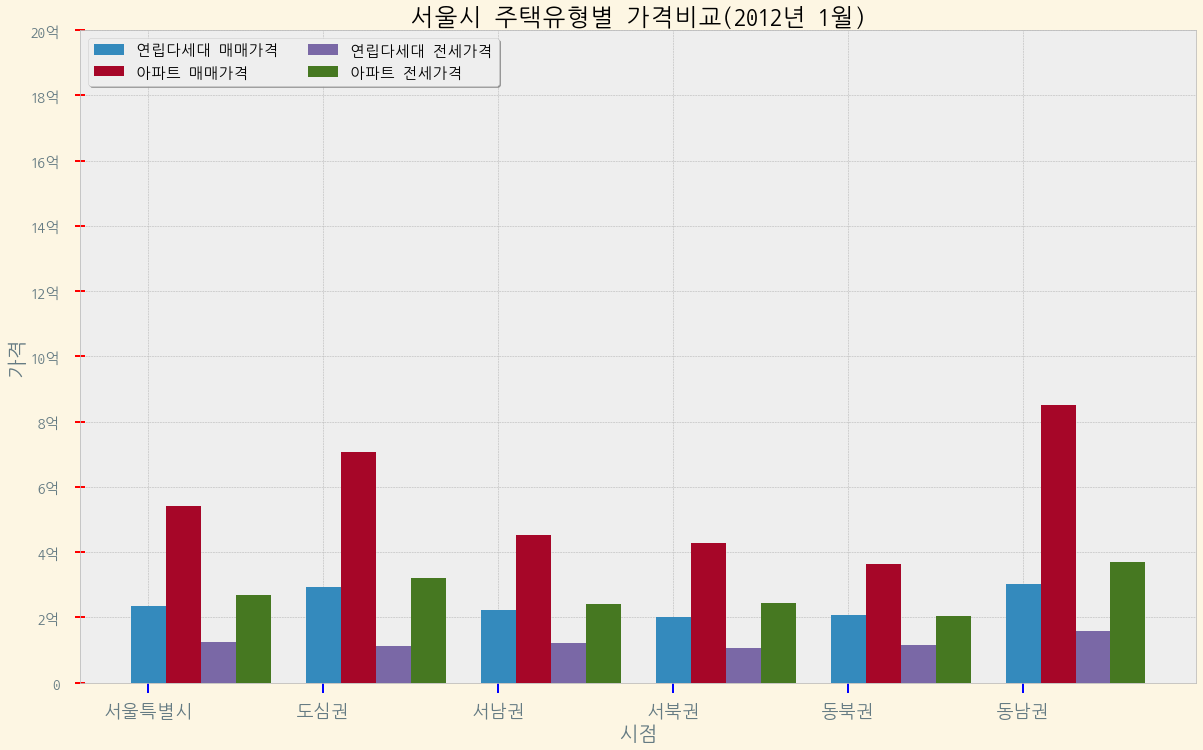

In [ ]:
fig = plt.figure(figsize=(20,12))
plt.style.use('bmh')
plt.title('서울시 주택유형별 가격비교(2012년 1월)', fontsize=24) 

x = np.array(range(len(df_price.columns)))
w = 0.2

plt.bar(x, df_price_2006.iloc[0], width=w, label='연립다세대 매매가격')

x = x + w
plt.bar(x, df_price_2006.iloc[1], width=w, label='아파트 매매가격')

x = x + w
plt.bar(x, df_price_2006.iloc[2], width=w, label='연립다세대 전세가격')

x = x + w
plt.bar(x, df_price_2006.iloc[3], width=w, label='아파트 전세가격')

plt.legend(loc='upper left', ncol=2, fontsize=15,  frameon=True, shadow=True)

labels = ['0','2억','4억','6억','8억','10억','12억','14억','16억','18억','20억']

plt.xlabel('시점', fontsize=20)
plt.ylabel('가격', rotation=90, fontsize=20)   
plt.xticks(range(6), df_price.columns, fontsize=15, )
plt.yticks(range(0, 2200000, 200000),labels=labels, fontsize=15)
plt.tick_params(axis='x', direction='out', length=10, width=2, pad=10, labelsize=18, color='b')
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=15, width=2, color='r')

plt.show()

In [ ]:
df_house = house_avg_price_deal['2021-11'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_house['구분'] = '연립다세대 매매가격'

df_house2 = house_avg_price_charter['2021-11'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_house2['구분'] = '연립다세대 전세가격'

df_apt = apt_avg_price_deal['2021-11'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_apt['구분'] = '아파트 매매가격'

df_apt2 = apt_avg_price_charter['2021-11'][['서울특별시','도심권','서남권','서북권','동북권','동남권']]
df_apt2['구분'] = '아파트 전세가격'

df_price = df_house.append(df_apt)
df_price = df_price.append(df_house2)
df_price = df_price.append(df_apt2)
df_price = df_price.set_index(keys='구분',drop=True)
df_price


,서울특별시,도심권,서남권,서북권,동북권,동남권
구분,,,,,,
연립다세대 매매가격,352035,498504,290359,306956,277658,522160
아파트 매매가격,1148288,1369520,947148,989903,871360,1826114
연립다세대 전세가격,245597,349598,200422,212247,196537,363825
아파트 전세가격,632236,748567,538545,569768,493802,952442


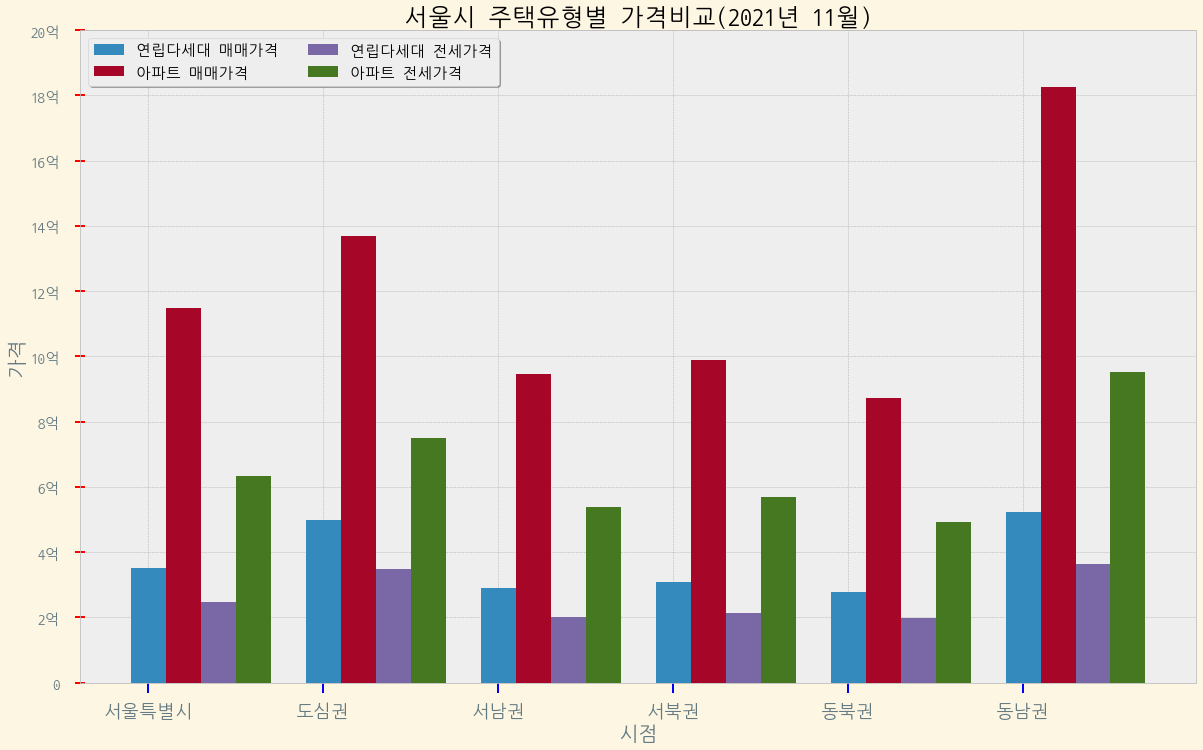

In [ ]:
fig = plt.figure(figsize=(20,12))
plt.style.use('bmh')
plt.title('서울시 주택유형별 가격비교(2021년 11월)', fontsize=24) 

x = np.array(range(len(df_price.columns)))
w = 0.2

plt.bar(x, df_price.iloc[0], width=w, label='연립다세대 매매가격')

x = x + w
plt.bar(x, df_price.iloc[1], width=w, label='아파트 매매가격')

x = x + w
plt.bar(x, df_price.iloc[2], width=w, label='연립다세대 전세가격')

x = x + w
plt.bar(x, df_price.iloc[3], width=w, label='아파트 전세가격')

plt.legend(loc='upper left', ncol=2, fontsize=15,  frameon=True, shadow=True)

labels = ['0','2억','4억','6억','8억','10억','12억','14억','16억','18억','20억']

plt.xlabel('시점', fontsize=20)
plt.ylabel('가격', rotation=90, fontsize=20)   
plt.xticks(range(6), df_price.columns, fontsize=15, )
plt.yticks(range(0, 2200000, 200000),labels=labels, fontsize=15)
plt.tick_params(axis='x', direction='out', length=10, width=2, pad=10, labelsize=18, color='b')
plt.tick_params(axis='y', direction='inout', length=10, pad=15, labelsize=15, width=2, color='r')

plt.show()

In [ ]:
apt_avg_price_year = apt_avg_price_deal['서울특별시'][]
apt_avg_price_year

2012-01-01     540954
2012-02-01     538876
2012-03-01     536079
2012-04-01     532409
2012-05-01     529733
               ...   
2021-07-01    1109300
2021-08-01    1119250
2021-09-01    1130427
2021-10-01    1140659
2021-11-01    1148288
Name: 서울특별시, Length: 119, dtype: int64

In [ ]:
GNI = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/전처리/시도별_1인당_지역내총생산__지역총소득__개인소득_20220122220409.xlsx')
GNI = GNI.set_index(keys='시도별').swapaxes(axis1=0,axis2=1)

In [ ]:
GNI.index = GNI.index.astype(dtype='int64')

<Figure size 720x576 with 0 Axes>

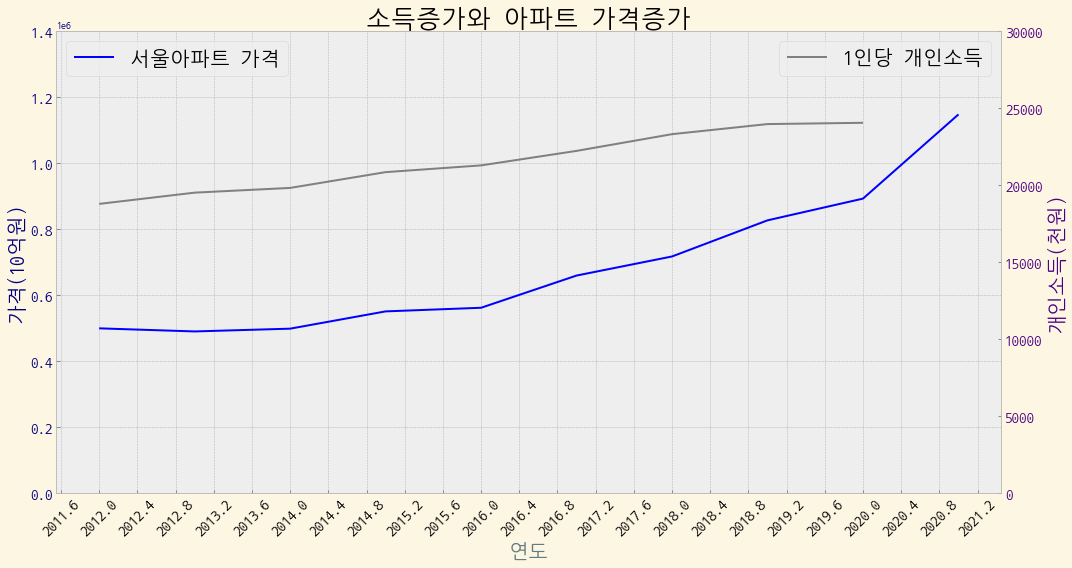

In [ ]:
fig = plt.figure(figsize=(10, 8))
fig, ax1 = plt.subplots(figsize=(15, 8))
ax2 = ax1.twinx()

x = np.array(range(len(GNI.index)))
w = 0.2

ax1.set_title('소득증가와 아파트 가격증가', fontsize=25)
ax1.set_xlabel('연도', fontsize=20)
ax1.set_ylabel('가격(10억원)', fontsize=20, color = 'navy')
ax2.set_ylabel('개인소득(천원)', fontsize=20, color = 'indigo')

ax1.plot(GNI.index, GNI['서울 매매가'].values, color='blue', label='서울아파트 가격')
x =x+w
ax2.plot(GNI.index, GNI['서울특별시'].values, color='gray', label='1인당 개인소득')


ax1.xaxis.set_major_locator(MaxNLocator(25))
ax1.set_ylim(0,1400000,200000)
ax2.set_ylim(0,30000,30000)
ax1.tick_params(axis='x', labelsize=15, labelcolor='black' , rotation=45)
ax1.tick_params(axis='y', labelsize=15, labelcolor='navy')
ax2.tick_params(axis='y', labelsize=15, labelcolor='indigo')



ax1.legend(loc = 'upper left', fontsize=20, ncol=4)
ax2.legend(loc = 'upper right', fontsize=20, ncol=4)

plt.tight_layout()
plt.grid(False)

plt.show()

In [ ]:
GNI = pd.read_excel('/content/drive/MyDrive/[D9&10] 데이터시각화 프로젝트_3조/김명진/발표 자료 데이터/raw데이터/시도별_1인당_지역내총생산__지역총소득__개인소득_20220122220409.xlsx')
GNI = GNI.set_index(keys='시도별').swapaxes(axis1=0,axis2=1)

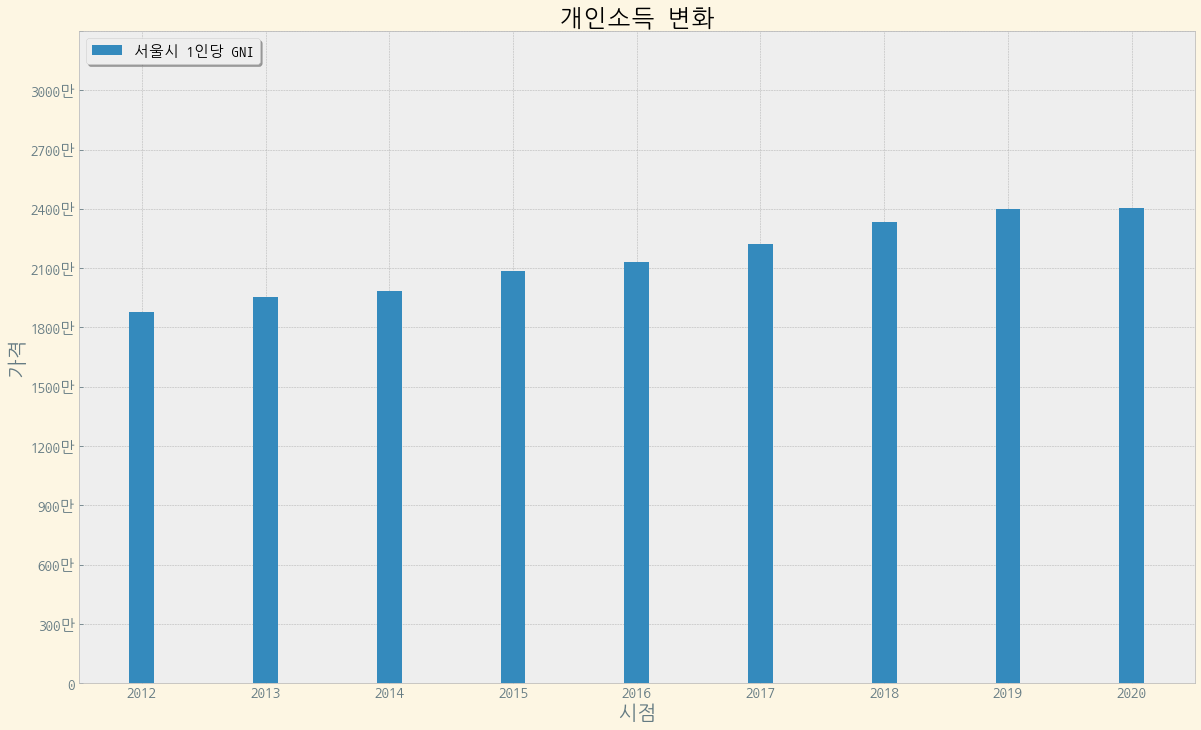

In [ ]:
fig = plt.figure(figsize=(20,12))
plt.style.use('bmh')
plt.title('개인소득 변화', fontsize=24) 

x = np.array(range(len(GNI.index)))
w = 0.2

plt.bar(x, GNI['서울특별시'], width=w, label='서울시 1인당 GNI')

plt.legend(loc='upper left', ncol=2, fontsize=15,  frameon=True, shadow=True)

labels = ['0','300만','600만','900만','1200만','1500만','1800만','2100만','2400만','2700만','3000만']
plt.xticks(range(9), GNI.index, fontsize=15, )
plt.yticks(range(0, 35000, 3000),labels=labels, fontsize=15)
plt.xlabel('시점', fontsize=20)
plt.ylabel('가격', rotation=90, fontsize=20)   

plt.show()

- 같은 기간 서울의 1인당 개인소득은 1800만원에서 2400만원으로 1.3배정도 증가
- 개인소득 : 가계의 구매력, 임의로 처분할 수 있는 소득. 실질적으로 사용할 수 있는 소득
- 같은기간 서울의 집값은 2배 증가한 반면 실질소득은 1.3배 밖에 오르지 않았음을 통해 점점 주거소유가 힘들어짐을 알 수 있음.